<h1 style="margin: 2rem 0;font-family:'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande';text-align: center;">Synergy Logistics - Proyecto 2</h1>
    
<div style="text-align: center;">
    <img src="./img/img.png" style="width: 70%;">
    <h2 style="margin: 1rem 2rem;font-family:'Lucida Sans';">Emtech Institute</h2>
    <h3 style="margin: 1rem 2rem;font-family:'Lucida Sans';">Alfredo Gómez</h3>
    <h4 style="margin: 1rem 2rem;font-family:'Lucida Sans';">Octubre/2021</h4>
    <a style="font-family:'Lucida Sans';" href="https://github.com/AlfredoZim/Proyecto-2-Gomez-Alfredo">Link a Repositorio de Github</a>
</div>
<hr>

<div style="margin: 1rem 3rem;">
    <h2 style="font-family:'Lucida Sans';text-align: center;margin-bottom:4rem;">Introducción</h2>
    <img src="./img/img1.png" style="margin:1rem 0;float: right;width: 40%;">
    <p style="font-family:'Lucida Sans';">
        Synergy Logistics es una empresa dedicada a la intermediación de servicios de
        importación y exportación de diferentes productos.
        <br><br>Actualmente la empresa cuenta con una base de datos que refleja las 
        rutas más importantes que opera desde el año 2015, con su respectivo origen y 
        destino, año, producto, modo de transporte y valor total. 
        <br><br>A partir de estos datos se generará un análisis para la estructuración 
        de la estrategia operativa.
        <br><br>La Dirección de dicha empresa ha solicitado al equipo operativo, realizar una
        propuesta que permita enfocar las prioridades de la estrategia operativa 2021; para
        ello, se plantea analizar la viabilidad de 3 opciones de enfoque:
    </p>
    <ul style="font-family:'Lucida Sans';">
        <li style="margin: 2rem 0;">
            <b>Opción 1)</b> Rutas de importación y exportación.
        </li>
        <li style="margin: 2rem 0;">
            <b>Opción 2)</b> Medio de transporte utilizado.
        </li>
        <li style="margin: 2rem 0;">
            <b>Opción 3)</b> Valor total de importaciones y exportaciones.
        </li>
    </ul>
    <p style="font-family:'Lucida Sans';">
        Los datos requeridos se extraerán del archivo base que contiene toda la información 
        respecto a envios. Con base a los datos primero se calcularán las 10 principales rutas 
        más demandadas, los 3 principales medio de transporte y por último destacar los paises 
        que generán el 80% del valor de las exportaciones e importaciones, esto separado por grupos.
        <br><br> El proyectó estará dividido en secciones en cuanto al código y explicación se refiere, y 
        al tener claras cada una de las opciones se concluirá en decidir cual será la más conveniente.
    </p>
</div>
<hr>

<div style="margin: 1rem 3rem;">
    <h2 style="font-family:'Lucida Sans';text-align: center;margin-bottom:4rem;">Opción sugerida como base de la estrategia de Synergy logistics</h2>
<p style="font-family:'Lucida Sans';">
Como primer paso importamos la libreria de pandas, la cual nos permitirá leer archivos CSV, y de la misma manera poder realizar operaciones, filtraciones, agrupaciones, y de más, más facilmente.
    <br>
    Colocaremos como indice la columna del id de registro que viene en el archivo,
</p>
</div>

In [337]:
import pandas as pd
df = pd.read_csv("synergy_logistics_database.csv",index_col="register_id")

<div style="margin: 1rem 3rem;">
    <h3 style="font-family:'Lucida Sans';margin: 1rem 0;">Opción 1) Rutas de importación y exportación.</h3>
<p style="font-family:'Lucida Sans';">
    Una vez teniendo el dataframe del archivo csv, se ordena de acuerdo al origen y destino, lo cual conforma una ruta, sumando en total el número de viajes hechos en dicha ruta, tambien se muestra la suma del valor total por cada ruta para.
</p>
</div>

In [338]:
rutas_group = df.groupby(["origin","destination"]).agg({
    "destination":"count",
    "total_value":"sum"})
rutas_group = rutas_group.rename(columns={"destination":"viajes","total_value":"Valor total"})
rutas_group = rutas_group.sort_values(by=["viajes"], ascending=False)
rutas = rutas_group.head(10)
rutas

viajes  Valor total
origin      destination                     
South Korea Vietnam         497   6877007000
Netherlands Belgium         437   3238142000
USA         Netherlands     436   1032187000
Japan       Mexico          385   5829000000
China       Mexico          351  12494000000
            Japan           343   5891000000
Germany     China           328   3495875000
Japan       Brazil          306   3368155000
Germany     France          299   2902214000
South Korea Japan           294   4741000000

<div style="margin: 1rem 3rem;">
<p style="font-family:'Lucida Sans';">
    Como se muestra en la tabla, aunque la columna valores totales varía mucho es importante mencionar que estas rutas son más constantes que el resto, por lo que nos dan cierta seguridad para saber que si enfocamos los esfuerzos en estas seguro no será motivo de arrepentimiento, pero esto no quiere decir que sea la mejor opción, ya que  dichos datos (las rutas con más viajes) en comparación con las rutas con mayor valor podemos notar la gran diferencia. 
    <br><br>Aunque haya rutas con menos viajes son de mayor valor, entonces realizar 1 o 2 viajes nos garantiza una alza significante de valor, puede que no sean viajes constantes pero son realmente significativos.
</p>
</div>

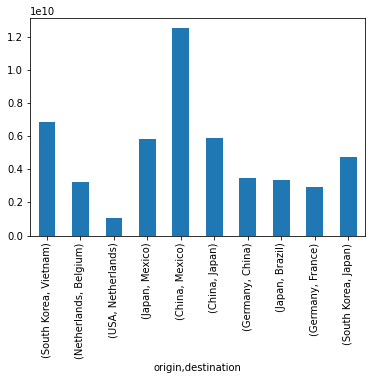

In [339]:
import matplotlib.pyplot as plt
rutas["Valor total"].plot(kind="bar")
plt.show()

<div style="margin: 1rem 3rem;">
<p style="font-family:'Lucida Sans';">
    Esta es su grafica respecto a a la cantidad de viajes por ruta, se muestran las primeras 10 rutas.
</p>
</div>

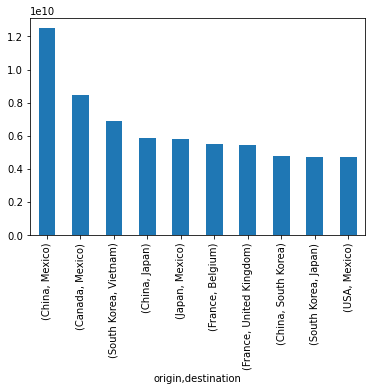

In [340]:
rutas_group = rutas_group.sort_values(by=["Valor total"], ascending=False)
best_valor = rutas_group.head(10)
best_valor["Valor total"].plot(kind="bar")
plt.show()

<p style="margin: 1rem 3rem;font-family:'Lucida Sans';">
    Esta gráfica muestra las rutas que han generado más valor, y como se puede observar, se tienen algunas rutas que tienen menos de la mitad del maximo de viajes que ha hecho la ruta más solicitada, por lo que si llega a realizarse 1 solo viaje afectará en mayor medida al valor total de la ruta.
</p>

<div style="margin: 1rem 3rem;">
    <h3 style="font-family:'Lucida Sans';margin: 1rem 0;">Opción 2) Medio de transporte utilizado.</h3>
<p style="font-family:'Lucida Sans';">
    En la siguiente tabla se muestran cuales son los 3 metodos de transporte que generan mayor valor sumando el de sus importaciones y el de sus exportaciones.
    <br><br>
    Primero se se agrupan por modo de transporte, agregandole la funcion de contar ambos valores, tanto de importacón como de exportación, de igual manera se cuenta la cantidad de viajes que se realizaron por este medio, y por ultimo se escogen los primeros 3.
</p>
</div>

In [396]:
transport_group = df.groupby(["transport_mode"]).agg({
    "direction":"count",
    "total_value":"sum"})
transport_group = transport_group.rename(columns={"direction":"Cantidad","total_value":"Valor/Modo"}).sort_values(by=["Valor/Modo"], ascending=False)
transport_group.head(3)

,Cantidad,Valor/Modo
transport_mode,,
Sea,10688,100530622000
Rail,3381,43628043000
Air,2389,38262147000


In [324]:
print("Valor del último medio de transporte: ",int(transport_group.tail(1)["Valor/Modo"]),
      "\nCantida de viajes: ",int(transport_group.tail(1)["Cantidad"]))

Valor del último medio de transporte:  33270486000 
Cantida de viajes:  2598


<div style="margin: 0 3rem;">
<p style="font-family:'Lucida Sans';">
    Como podemos ver, el valor que genera el último medio de transporte no es el que tiene menos usos, y esto hace que no sea del todo conveniente darle menos importancia.
    <br><br>
    Aunque tengamos el problema antes mencionado yo creo que esta puede ser la solución adecuada, aunque ya que existen clientes a los que se les brinda el sevicio unicamente por este metodo aún contamos con otros. Sabiendo que se tienen 4 metodos de transporte y este es el que rinde menores resultado serìa conveniente enforcarnos en los otros reduciendo este, de igual manera puede ser el metodo màs inseguro ya que se mueve por tierra y por hace más vulnerable que el resto.
</p>
</div>

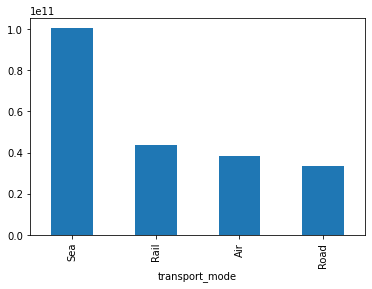

In [342]:
transport_group["Valor/Modo"].plot(kind="bar")
plt.show()

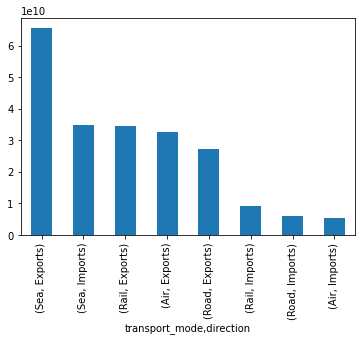

In [343]:
transport_all = df.groupby(["transport_mode","direction"]).agg({"total_value":"sum"})
transport_all = transport_all.rename(columns={"total_value":"Valor/Modo"}).sort_values(by=["Valor/Modo"], ascending=False)
transport_all["Valor/Modo"].plot(kind="bar")
plt.show()

<div style="margin: 1rem 3rem;">
<p style="font-family:'Lucida Sans';">
    Aquí se muestra cómo afecta la importación y la exportación de cada metodo de transporte, y se puede notar que casi no hay diferencia entre todos los metodos de transporte que no son maritimos, y que solo afecta en cuanto a la importación.
</p>
</div>

<div style="margin: 1rem 3rem;">
    <h3 style="font-family:'Lucida Sans';margin: 1rem 0;">Opción 3) Valor total de importaciones y exportaciones.</h3>
<p style="font-family:'Lucida Sans';">
    Como última opción se puede calcular el valor generado por pais de acuerdo a sus exportaciones e importaciones. En este metodo primero debemos saber el porcentaje que tiene cada pais en cuanto al valor que genera para la empresa.
</p>
</div>

In [387]:
paises = df.groupby("origin").agg({"total_value":"sum"}).sort_values(by="total_value", ascending=False)
paises["total_value"] = paises["total_value"]*100/sum(paises["total_value"])
paises = paises.rename(columns={"total_value":"Porcentaje/valor"})
paises


,Porcentaje/valor
origin,
China,20.960533
USA,10.963032
Japan,9.292436
France,9.240211
South Korea,8.581777
Germany,7.229421
Russia,6.525066
Canada,5.217178
Italy,3.076009


<div style="margin: 1rem 3rem;">
<p style="font-family:'Lucida Sans';">
    La tabla de arriba muestra el valor que genera cada pais representado en su porcentaje equivalente, tambien está ordenado de manera descendente para destacar a los que representan mayor valor para Synergy Logistics.
    <br><br>
    Enseguida se extraerán los valores en porcentajes para poder descartar los últimos que ya no entran al 80% principal que genera ingresos.
</p>
</div>

In [345]:
valores = paises["Porcentaje/valor"].tolist()
suma_valores = 0
cantidad = 0
for i in range(len(valores)):
    suma_valores += valores[i]
    cantidad += 1
    if suma_valores > 80:
        suma_valores2 = suma_valores-valores[i-1]
        cantidad2 = cantidad-1
        break
print("Suma de los primeros ",cantidad," valores: ",suma_valores)
print("Suma de los primeros ",cantidad2," valores: ",suma_valores2)

Suma de los primeros  9  valores:  81.08566484680343
Suma de los primeros  8  valores:  75.86848635868472


<div style="margin: 0 3rem;">
<p style="font-family:'Lucida Sans';">
    Realicé un calculo de los primeros paises que generan en conjunto un porcentaje más cercano al 80%, como el calculo no da exactamente el porcentaje requerido se tomará la cantidad de valores que estén más cercanos a dicho porcentaje.
    <br><br>
    Con los datos obtenidos se muestran en la siguiente grafica los paises que generan el 80% del valor, o el porcentaje más próximo.
</p>
</div>

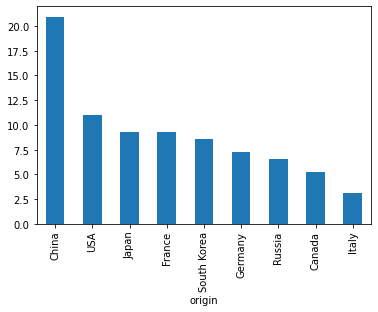

In [397]:
paises.head(cantidad)["Porcentaje/valor"].plot(kind="bar")
plt.show()

<div style="margin: 0 3rem;">
<p style="font-family:'Lucida Sans';">
    Esta opción no podría ser la más adecuada desde mi punto de vista, ya que, aunque existen paises que generan menos de 1% del valor total y enfocarse en los principales puede dar un resultado favorable, se dejaría de lado a los demás paises y estos son una mayoría. Pobrablemente en un futuro estos paises que generan menor valor sean más significativos, y enforcarse en ellos podria dar un mejor resultado.
</p>
</div>

<hr>

<div style="margin: 1rem 3rem;">
    <h2 style="font-family:'Lucida Sans';text-align: center;margin-bottom:4rem;">Conclusión</h2>
    <img src="./img/img3.png" style="margin:1rem 0;float: left;width: 40%;">
    <p style="font-family:'Lucida Sans';">
        La mejor opción sin duda es la segunda, ya que afectaría en menor medida al valor de la empresa si es que tomamos en cuenta el valor que afectan las otras dos opciones. 
    <br><br>El único problema de esta opción es que al querer reducir este meetodo de transporte, se pueden ver afectado los paises de destino y los de origen alos que deban llegar productos, aunque el tener un enfoque hacia los otros 2 metodos se puede llegar a un acuerdo..
    <br><br>Como se muestra a continuación el valor total generado es de $215,691,298,000.00, de acuerdo al porcentaje en el que se enfocará podremos ver cual opción es la que puede venir mejor.
    </p>
</div>

In [363]:
Valor_empresa = sum(transport_group["Valor/Modo"])
Valor_empresa

215691298000

<div style="margin: 0 3rem;">
    <p style="font-family:'Lucida Sans';">
        De acuerdo al valor total que se ha generado a lo largo de los años se puede calcular qué porcentaje es lo que realmente afecta.
    </p>
</div>

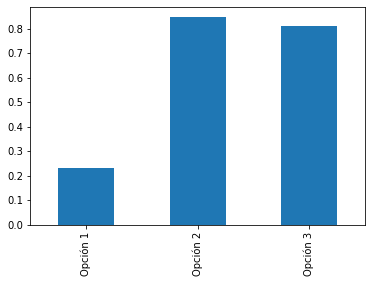

In [393]:
opciones = pd.DataFrame()
#Valor de la opción 1
op_1 = rutas["Valor total"].tolist()
suma_op1 = sum(op_1)
por_op1 = suma_op1/Valor_empresa
#Valor de la opción 2
op_2 = transport_group["Valor/Modo"].head(3).tolist()
suma_op2 = sum(op_2)
por_op2 = suma_op2/Valor_empresa
#Valor de la opción 3
paises_g = df.groupby("origin").agg({"total_value":"sum"}).sort_values(by="total_value", ascending=False)
op_3 = paises_g["total_value"].head(cantidad)
suma_op3 = sum(op_3)
por_op3 = suma_op3/Valor_empresa

# creamos las columnas
opciones['Valor Enfocado  '] = None
opciones['Porcentaje del valor'] = None
# añadimos filas por su nombre de fila
opciones.loc['Opción 1'] = [suma_op1, por_op1]
opciones.loc['Opción 2'] = [suma_op2, por_op2]
opciones.loc['Opción 3'] = [suma_op3, por_op3]

opciones["Porcentaje del valor"].plot(kind="bar")
plt.show()

<div style="margin: 0 3rem;">
    <p style="font-family:'Lucida Sans';">
        Se calculó el total del valor que abarca cada opción, o en la que se enfocaría, y de acuerdo a los resultado obtenidos yo creo que sin dudase puede elegir la opción 3, ya que hablamos de más del 80% del valor asegurado. Sin embargo, tomar en cuenta el tercer punto no estaría del todo mal, bien se puede realizar una selección de paises que estén acorde a lo sugerido en la opción 2 aunque hablariamos de un sector en especifico de origenes y destinos.
    </p>
</div>